### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [5]:
X[1].min(), X[1].max()

(0, 10)

In [6]:
X[2].min(), X[2].max()

(450, 2000)

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [9]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

In [10]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [11]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

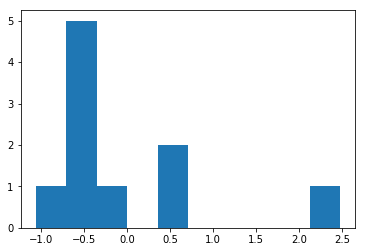

In [12]:
plt.hist(X_st[1])
plt.show()

In [13]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [14]:
X_st[2] = calc_std_fit(X[2])

In [15]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [16]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [17]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [18]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [31]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [85]:
n=120
coeffs = np.zeros((n, X.shape[0]))
lambda_list = np.logspace(-5, 3.5, n)
for i, val in enumerate(lambda_list):
    coeffs[i, :] = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=val)

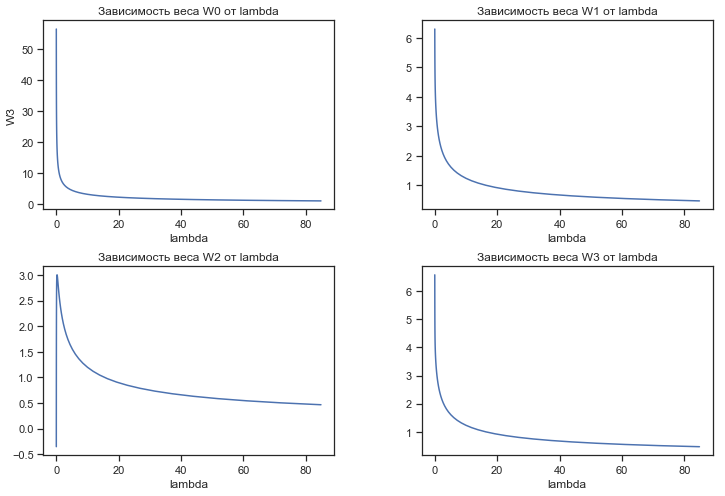

In [86]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
plt.xlabel('lambda')

ax1.plot(lambda_list, coeffs[:, 0])
ax1.set_title('Зависимость веса W0 от lambda')
ax1.set_ylabel('W0')
ax1.set_xlabel('lambda')

ax2.plot(lambda_list, coeffs[:, 1])
ax2.set_title('Зависимость веса W1 от lambda')
ax1.set_ylabel('W1')
ax2.set_xlabel('lambda')

ax3.plot(lambda_list, coeffs[:, 2])
ax3.set_title('Зависимость веса W2 от lambda')
ax1.set_ylabel('W2')
ax3.set_xlabel('lambda')

ax4.plot(lambda_list, coeffs[:, 3])
ax4.set_title('Зависимость веса W3 от lambda')
ax1.set_ylabel('W3')
ax4.set_xlabel('lambda')

fig.set_size_inches(12, 8)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нормализация [0, 1]

In [113]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

In [114]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())

In [115]:
X_st = X_norm.copy()
X1_mean = X[1].mean()
X1_std = X[1].std()
X2_mean = X[2].mean()
X2_std = X[2].std()

In [116]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st[2] = (X[2] - X1_mean) / X2_std
cols = [1, 2]
X_norm[cols, :], X_st[cols, :]

(array([[0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
         0.        , 0.5       , 1.        , 0.1       , 0.2       ],
        [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
         0.22580645, 0.67741935, 1.        , 0.        , 0.35483871]]),
 array([[-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
         -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
        [ 1.02496016,  1.43741898,  1.54053368,  1.23118957,  2.98413954,
          1.64364838,  3.08725424,  4.11840128,  0.92184546,  2.0561072 ]]))

Попробовал применить, вроде все получилось. 
Если мы применим, например,к одному признаку и нормализацию и стандартизацию, а к другим только нормализацию, то таким образом мы изменим признак для алгоритма,и тогда он будет считать уже не корректно расстояние до гиперплоскости, т.к. масштабы будут не совпадать.